In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set()
titanic = sns.load_dataset("titanic")

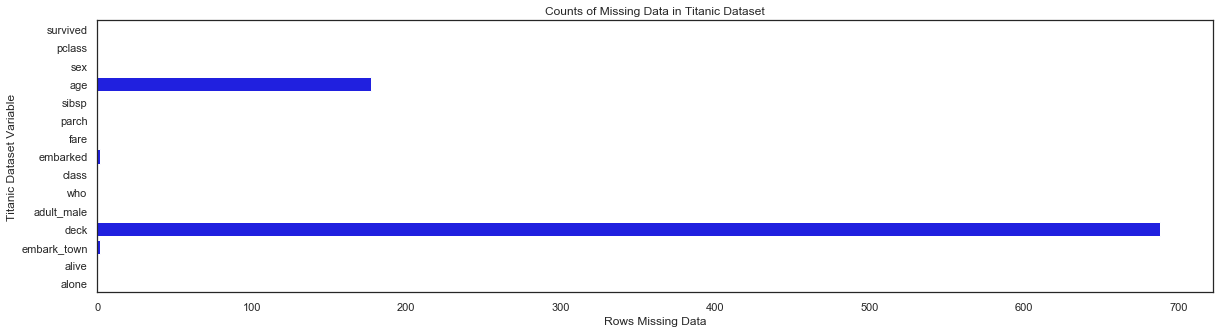

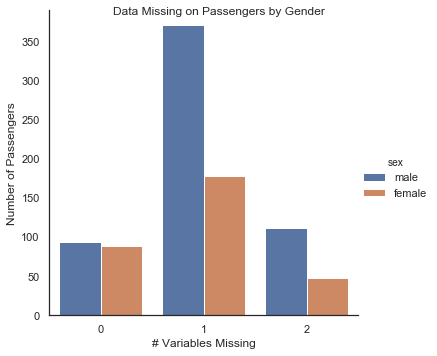

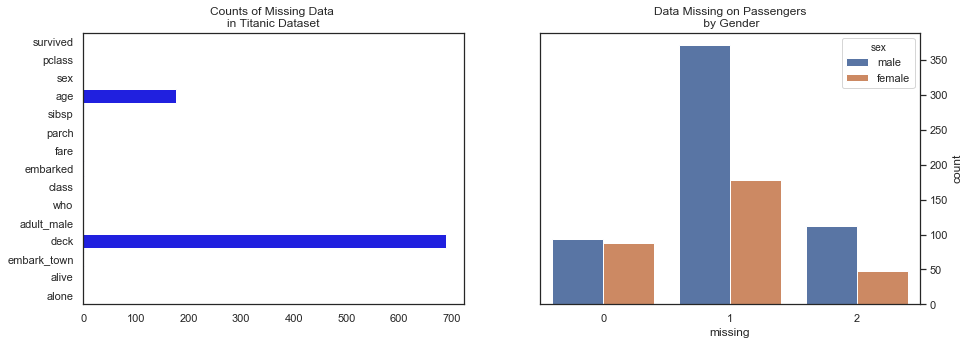

In [2]:
#Missing Data Exploration
missing= titanic.isna().sum() #sum up all NA values in titanic dataset

#Missing Data Each Variable
with sns.axes_style('white'): #white background
    plt.figure(figsize=(20,5)) #figure size 
    ax =sns.barplot(x = missing.values, #values 
                y=missing.index, #all the labels for variable names
                color = "blue")
    ax.set_title('Counts of Missing Data in Titanic Dataset')
    ax.set_ylabel('Titanic Dataset Variable')
    ax.set_xlabel('Rows Missing Data')

#Missing Data Each Passenger by Gender
m = titanic.isna().sum(axis=1) #row sums for NA data 
missing2 = pd.DataFrame({"missing": m, "sex": titanic.sex}) #combine with sex info

with sns.axes_style('white'): #white background
    ax2 = sns.catplot("missing", hue="sex",data=missing2,
                kind="count") #counting by category (# missing) and splitting by sex
    ax2.set_axis_labels(x_var="# Variables Missing", y_var="Number of Passengers") #labels
    ax2.fig.suptitle("Data Missing on Passengers by Gender") #title

## All in one figure 
with sns.axes_style('white'):
    f, (ax1, ax2) = plt.subplots(ncols =2, nrows =1) #make a 2 column empty graph
    f.set_size_inches(15, 5)
    ax2.yaxis.tick_right() #move ticks to the right for second plot for easier reading
    ax2.yaxis.set_label_position("right") #moves the label too
    sns.barplot(x = missing.values, 
                y=missing.index, 
                color = "blue", ax = ax1) #puts in first column
    ax1.set_title('Counts of Missing Data \nin Titanic Dataset') #title
    sns.catplot("missing", hue="sex",data=missing2,
                kind="count", ax = ax2) #puts in 2nd column
    ax2.set_title("Data Missing on Passengers\n by Gender") #title
plt.close(4) #a lazy workaround to get rid of catplot's empty plot 

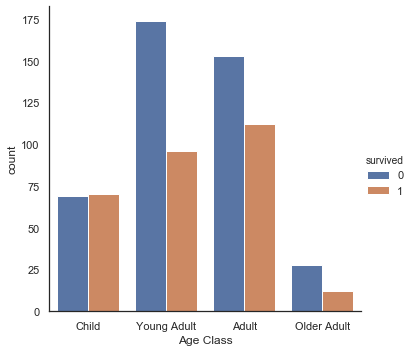

In [5]:
## Survival Exploration
titanic2 = titanic.select_dtypes(include=np.number).dropna() #remove non-numeric columns and any NA filled rows
with sns.axes_style('white'):
    sns.pairplot(titanic2, hue = 'survived') 

titanic2['Age Class'] = pd.cut(x=titanic2['age'], bins=[0,18, 30, 55, 100]) #creates a new column with age sorted into bins
with sns.axes_style('white'):
    g = sns.catplot("Age Class",hue = "survived", data=titanic2,
                kind="count")
    new_labels = ['Child', 'Young Adult', 'Adult', 'Older Adult'] #relabel bins
    g.set_xticklabels(new_labels)

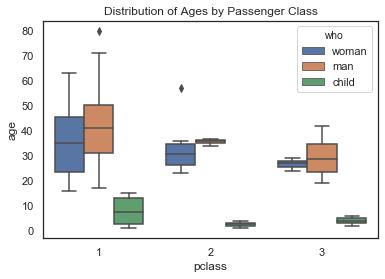

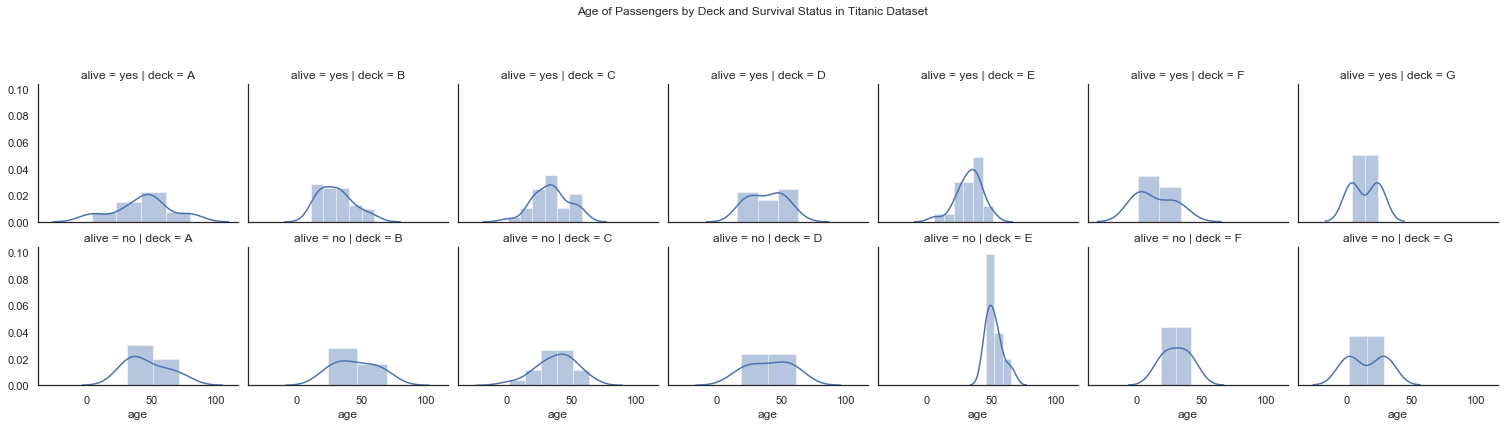

In [31]:
#miscellaneous graphs of my choosing
titanic3 = titanic.dropna()

#distribution of ages across groups within each fare class
with sns.axes_style('white'):
    g1 = sns.boxplot(x='pclass',y='age', hue = "who", data=titanic3)
    g1.set_title('Distribution of Ages by Passenger Class')

#Another plot, this time about age/survival status in relation to what deck they were on

with sns.axes_style('white'):
    g = sns.FacetGrid(titanic3, row='alive', col='deck', sharex=True, sharey=True)
    g.map(sns.distplot, "age")
    plt.subplots_adjust(top=0.8) #avoid overlapping title with facet labels 
    g.fig.suptitle('Age of Passengers by Deck and Survival Status in Titanic Dataset') #title